<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h1>Momentum</h1>


<h3>Objective for this Notebook<h3>    
<h5> 1. Learn Saddle Points, Local Minima, and Noise</h5>     


<h2>Table of Contents</h2>
<p>In this lab, you will deal with several problems associated with optimization and see how momentum can improve your results.</p>
<ul>
    <li><a href="https://#Saddle">Saddle Points</a></li>
    <li><a href="https://#Minima">Local Minima</a></li>
    <li><a href="https://#Noise"> Noise </a></li>
</ul>

<p>Estimated Time Needed: <b>25 min</b></p>
<hr>


<h2>Preparation</h2>


Import the following libraries that you'll use for this lab:


In [1]:
# These are the libraries that will be used for this lab.

import torch 
import torch.nn as nn
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

This function will plot a cubic function and the parameter values obtained via Gradient Descent.


In [2]:
# Plot the cubic

def plot_cubic(w, optimizer):
    LOSS = []
    # parameter values 
    W = torch.arange(-4, 4, 0.1)
    # plot the loss fuction 
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(cubic(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 4.0
    n_epochs = 10
    parameter = []
    loss_list = []

    # n_epochs
    # Use PyTorch custom module to implement a ploynomial function
    for n in range(n_epochs):
        optimizer.zero_grad() 
        loss = cubic(w(torch.tensor([[1.0]])))
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    plt.plot(parameter, loss_list, 'ro', label='parameter values')
    plt.plot(W.numpy(), LOSS, label='objective function')
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

This function will plot a 4th order function and the parameter values obtained via Gradient Descent. You can also add Gaussian noise with a standard deviation determined by the parameter <code>std</code>.


In [33]:
# Plot the fourth order function and the parameter values

def plot_fourth_order(w, optimizer, std=0, color='r', paramlabel='parameter values', objfun=True):
    W = torch.arange(-4, 6, 0.1)
    LOSS = []
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(fourth_order(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 6
    n_epochs = 100
    parameter = []
    loss_list = []

    #n_epochs
    for n in range(n_epochs):
        optimizer.zero_grad()
        loss = fourth_order(w(torch.tensor([[1.0]]))) + std * torch.randn(1, 1)
        loss_list.append(loss.item())
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    loss_list1=[]
    for i in loss_list:
        loss_list1.append(i.item())



    # Plotting
    if objfun:
        plt.plot(W.numpy(), LOSS, label='objective function')
    plt.plot(parameter, loss_list1, 'ro',label=paramlabel, color=color)
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

This is a custom module. It will behave like a single parameter value. We do it this way so we can use PyTorch's build-in optimizers .


In [34]:
# Create a linear model

class one_param(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(one_param, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias=False)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

We create an object <code>w</code>, when we call the object with an input of one, it will behave like an individual parameter value. i.e <code>w(1)</code> is analogous to $w$


In [35]:
# Create a one_param object

w = one_param(1, 1)

<!--Empty Space for separating topics-->


<h2 id="Saddle">Saddle Points</h2>


Let's create a cubic function with Saddle points


In [36]:
# Define a function to output a cubic 

def cubic(yhat):
    out = yhat ** 3
    return out

We create an optimizer with no momentum term


In [37]:
# Create a optimizer without momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0)

We run several iterations of stochastic gradient descent and plot the results. We see the parameter values get stuck in the saddle point.


RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

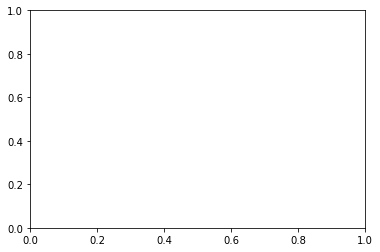

In [38]:
# Plot the model

plot_cubic(w, optimizer)

we create an optimizer with momentum term of 0.9


In [39]:
# Create a optimizer with momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0.9)

We run several iterations of stochastic gradient descent with momentum and plot the results. We see the parameter values do not get stuck in the saddle point.


RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

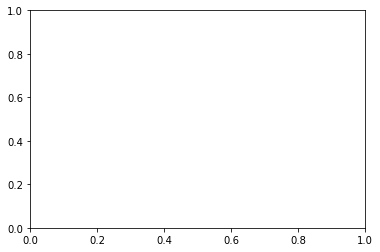

In [40]:
# Plot the model

plot_cubic(w, optimizer)

<!--Empty Space for separating topics-->


<h2 id="Minima">Local Minima</h2>


In this section, we will create a fourth order polynomial with a local minimum at <i>4</i> and a global minimum a <i>-2</i>. We will then see how the momentum parameter affects convergence to a global minimum. The fourth order polynomial is given by:


In [41]:
# Create a function to calculate the fourth order polynomial 

def fourth_order(yhat): 
    out = torch.mean(2 * (yhat ** 4) - 9 * (yhat ** 3) - 21 * (yhat ** 2) + 88 * yhat + 48)
    return out

We create an optimizer with no momentum term. We run several iterations of stochastic gradient descent and plot the results. We see the parameter values get stuck in the local minimum.


In [42]:
# Make the prediction without momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer)

AttributeError: 'float' object has no attribute 'item'

We create an optimizer with a  momentum term of 0.9. We run several iterations of stochastic gradient descent and plot the results. We see the parameter values reach a global minimum.


In [43]:
# Make the prediction with momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.001, momentum=0.9)
plot_fourth_order(w, optimizer)

AttributeError: 'float' object has no attribute 'item'

<!--Empty Space for separating topics-->


<h2 id="Noise">Noise</h2>


In this section, we will create a fourth order polynomial with a local minimum at 4 and a global minimum a -2, but we will add noise to the function when the Gradient is calculated. We will then see how the momentum parameter affects convergence to a global minimum.


with no momentum, we get stuck in a local minimum


In [ ]:
# Make the prediction without momentum when there is noise

optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer, std=10)

with  momentum, we get to the global  minimum


In [ ]:
# Make the prediction with momentum when there is noise

optimizer = torch.optim.SGD(w.parameters(), lr=0.001,momentum=0.9)
plot_fourth_order(w, optimizer, std=10)

<!--Empty Space for separating topics-->


<h3>Practice</h3>


Create two <code> SGD</code>  objects with a learning rate of <code> 0.001</code>. Use the default momentum parameter value  for one and a value of <code> 0.9</code> for the second. Use the function <code>plot_fourth_order</code> with an <code>std=100</code>, to plot the different steps of each. Make sure you run the function on two independent cells.


In [ ]:
# Practice: Create two SGD optimizer with lr = 0.001, and one without momentum and the other with momentum = 0.9. Plot the result out.

# Type your code here

Double-click <b>here</b> for the solution.

<!-- 
optimizer1 = torch.optim.SGD(w.parameters(), lr = 0.001)
plot_fourth_order(w, optimizer1, std = 100, color = 'black', paramlabel = 'parameter values with optimizer 1')

optimizer2 = torch.optim.SGD(w.parameters(), lr = 0.001, momentum = 0.9)
plot_fourth_order(w, optimizer2, std = 100, color = 'red', paramlabel = 'parameter values with optimizer 2', objfun = False)
 -->


<a href="https://dataplatform.cloud.ibm.com/registration/stepone?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork20647811-2021-01-01&context=cpdaas&apps=data_science_experience%2Cwatson_machine_learning"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/Watson_Studio.png"/></a>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork20647811-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork20647811-2021-01-01">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork20647811-2021-01-01">Mavis Zhou</a>


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                          |
| ----------------- | ------- | ---------- | ----------------------------------------------------------- |
| 2020-09-23        | 2.0     | Srishti    | Migrated Lab to Markdown and added to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
